In [95]:
## for data
import pandas as pd
import numpy as np
from pandasgui import show
import os
import sys

import datetime

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

PROJ_ROOT = os.path.join(os.pardir)

# Step 1: Import the dataset, explore and ready the data for analysis¶


In [96]:
aviation_data = r'/Users/robertreynoso/Desktop/Phase3_Project_Data/data/AviationDataEnd2016UP.csv'

data = pd.read_csv(aviation_data, encoding='latin-1')

In [97]:
data.head()

Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20170103X43747            Accident      WPR17LA046  2017-01-03   
1  20161230X55950            Accident      WPR17FA044  2016-12-29   
2  20161229X93022            Accident      CEN17LA062  2016-12-27   
3  20161227X80237            Accident      CEN17LA061  2016-12-27   
4  20161226X80840            Accident      WPR17FA041  2016-12-26   

         Location        Country   Latitude   Longitude Airport.Code  \
0    Paradise, MT  United States        NaN         NaN          NaN   
1       Dabob, WA  United States  47.823611 -122.790000          NaN   
2    Piedmont, MO  United States        NaN         NaN          NaN   
3  Farmington, MO  United States  37.761111  -90.428611          FAM   
4      Fresno, CA  United States  36.844444 -119.870834          E79   

      Airport.Name  ... Purpose.of.Flight Air.Carrier Total.Fatal.Injuries  \
0              NaN  ...          Personal         NaN                  NaN   
1              NaN  ...          Personal         NaN                  4.0   
2              NaN  ...          Personal         NaN                  NaN   
3  FARMINGTON RGNL  ...          Personal         NaN                  NaN   
4  Sierra Sky Park  ...          Personal         NaN                  2.0   

  Total.Serious.Injuries Total.Minor.Injuries Total.Uninjured  \
0                    2.0                  NaN             NaN   
1                    NaN                  NaN             NaN   
2                    NaN                  NaN             1.0   
3                    NaN                  1.0             1.0   
4                    NaN                  NaN             NaN   

  Weather.Condition  Broad.Phase.of.Flight Report.Status Publication.Date  
0               VMC                 CRUISE   Preliminary       05/01/2017  
1               VMC                    NaN   Preliminary       05/01/2017  
2               VMC                LANDING   Preliminary       03/01/2017  
3               VMC                TAKEOFF   Preliminary       29/12/2016  
4               VMC                TAKEOFF   Preliminary       05/01/2017  

[5 rows x 31 columns]

In [159]:
df['number_of_engines'].value_counts()

1.0     63082
2.0     10057
0.0      1275
3.0       477
4.0       415
18.0        1
Name: number_of_engines, dtype: int64

In [98]:
data.shape

(79293, 31)

## Explore values of the columns

In [99]:
data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.Damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.Flight', 'Air.Carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.Phase.of.Flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [100]:
# create a sub dataframe with the selected columns needed for analysis

df = data[['Event.Date', 'Location',  'Injury.Severity',  'Aircraft.Damage','Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.Phase.of.Flight' ]]

In [101]:
# rename the columns by remvoing the space and capital letters

df.columns = ['event_date', 'location', 'injury_severity', 
              'aircraft_damage', 'make', 'model', 
              'amateur_build', 'number_of_engines', 'engine_type',
              'total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries',
              'total_uninjured', 'weather_conditions', 'phase_of_flight'
             ]

In [102]:
df.shape

(79293, 15)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79293 entries, 0 to 79292
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   event_date              79293 non-null  object 
 1   location                79215 non-null  object 
 2   injury_severity         79293 non-null  object 
 3   aircraft_damage         76883 non-null  object 
 4   make                    79204 non-null  object 
 5   model                   79175 non-null  object 
 6   amateur_build           78721 non-null  object 
 7   number_of_engines       75175 non-null  float64
 8   engine_type             75919 non-null  object 
 9   total_fatal_injuries    55984 non-null  float64
 10  total_serious_injuries  53742 non-null  float64
 11  total_minor_injuries    54833 non-null  float64
 12  total_uninjured         66949 non-null  float64
 13  weather_conditions      77136 non-null  object 
 14  phase_of_flight         73239 non-null

In [104]:
#statistics on numerical data
df.describe()

number_of_engines  total_fatal_injuries  total_serious_injuries  \
count       75175.000000          55984.000000            53742.000000   
mean            1.148055              0.814679                0.317703   
std             0.453847              6.233700                1.372924   
min             0.000000              0.000000                0.000000   
25%             1.000000              0.000000                0.000000   
50%             1.000000              0.000000                0.000000   
75%             1.000000              1.000000                0.000000   
max            18.000000            349.000000              111.000000   

       total_minor_injuries  total_uninjured  
count          54833.000000     66949.000000  
mean               0.502581         5.790886  
std                2.781994        29.223016  
min                0.000000         0.000000  
25%                0.000000         0.000000  
50%                0.000000         1.000000  
75%                1.000000         2.000000  
max              380.000000       699.000000

In [105]:
df.isnull().sum()

event_date                    0
location                     78
injury_severity               0
aircraft_damage            2410
make                         89
model                       118
amateur_build               572
number_of_engines          4118
engine_type                3374
total_fatal_injuries      23309
total_serious_injuries    25551
total_minor_injuries      24460
total_uninjured           12344
weather_conditions         2157
phase_of_flight            6054
dtype: int64

## Plotting and data study functions

In [106]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( df[ var ].min() , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))
    
def category_values(dataframe, categories):
    for c in categories:
        print('\n', dataframe.groupby(by=c)[c].count().sort_values(ascending=False))
        print('Nulls: ', dataframe[c].isnull().sum())

In [107]:
'''
Recognize whether a column is numerical or categorical.
:parameter
    :param dtf: dataframe - input data
    :param col: str - name of the column to analyze
    :param max_cat: num - max number of unique values to recognize a column as categorical
:return
    "cat" if the column is categorical or "num" otherwise
'''
def utils_recognize_type(df, col, max_cat=20):
    if (df[col].dtype == "O") | (df[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

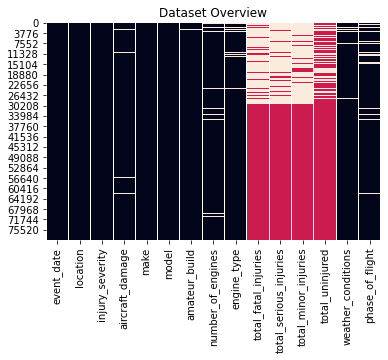

 Categerocial   Numeric   NaN 


In [108]:

dic_cols = {col:utils_recognize_type(df, col, max_cat=20) for col in df.columns}
heatmap = df.isnull()
for k,v in dic_cols.items():
 if v == "num":
   heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
 else:
   heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()

print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

## Data cleaning

In [109]:
#sort by ascending date
df = df.sort_values(by='event_date', ascending=True, na_position='first')

#sort make ascending
df = df.sort_values(by='make', ascending=True, na_position='first')

In [ ]:
#counts on unique values for each feature

describe_more(df)

In [110]:
#splitting date field in the components

df['Year'] = df['event_date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").year)
df['Month'] = df['event_date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").month)
df['Day'] = df['event_date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").day)


In [111]:
#clean 'make' column to Caps

df['make'] = df.make.str.upper()

In [119]:
#add a colunm that represents the total number of injuries in the accidents

#target column? split into fatl none fatal?

df['injuries'] = df['total_fatal_injuries'] + df['total_serious_injuries'] + df['total_minor_injuries']

df['pax_onboard'] = (df['total_uninjured']+df['injuries'])

df['fatality_percentage'] = (df['total_fatal_injuries']/df['pax_onboard'])*100

#target good math?
df['survived'] = df['pax_onboard'] - df['total_fatal_injuries']

#df['accident_classifier'] = logic that returns bool fatal or non-fatal

#fatal vs non fatal accident
#aircraft damage?


#need logic to help with missing values

#knnImpuiter vs mean of pax_onboard????


In [ ]:
gui  = show(df)

In [ ]:
#begin to look for unique categories

categories = ['event_date', 'location', 'injury_severity', 
              'aircraft_damage', 'make', 'model', 
              'amateur_build', 'number_of_engines', 'engine_type',
              'total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries',
              'total_uninjured', 'weather_conditions'
             ]
for c in categories:
    print(c ,df[c].unique())

In [ ]:
#count the number of different values for each category feature

category_values(df, categories)

In [ ]:
gui  = show(df)

## Filling Null values

In [113]:
#filling some Null values

#aircraft_damage, number_of_engines, engine_type use knn!!!

#set missing Locations to unknown
df['location'].fillna('Unknown', inplace=True)

#fixing weather conditions
df['weather_conditions'].fillna('UNK', inplace=True)


In [114]:
#extracting producers and amateurs

producers = [x for x in df['make'][df['amateur_build']== 'No'].unique() ]
amateurs  = [x for x in df['make'][df['amateur_build']== 'Yes'].unique() ]

# -----------------------------------------------
#function that fixes the null in amateur.build

def fix_amateur_built(ab, m):
    if type(ab) == str:
        return ab
    else:
        if m in producers:
            return 'No'
        else:
            return 'Yes'
#fix for amateur_build field

am_build = df.apply(lambda x: fix_amateur_built(x['amateur_build'], x['make']), axis=1)

df = df.assign(AmateurBuilt = am_build, index=df.index)

#drop old amateur column before saving to new df

In [120]:
#setting 0 engines for balloons
#.loc

df['number_of_engines'][df['number_of_engines'].isnull() & (df['make'].str.contains('balloon', case=False))] = 0.0

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [116]:
df.isnull().sum()

event_date                    0
location                      0
injury_severity               0
aircraft_damage            2410
make                         89
model                       118
amateur_build               572
number_of_engines          3986
engine_type                3374
total_fatal_injuries      23309
total_serious_injuries    25551
total_minor_injuries      24460
total_uninjured           12344
weather_conditions            0
phase_of_flight            6054
Year                          0
Month                         0
Day                           0
injuries                  29557
pax_onboard               29671
fatality_percentage       31071
survived                  29671
AmateurBuilt                  0
index                         0
dtype: int64

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79293 entries, 77738 to 12323
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   event_date              79293 non-null  object 
 1   location                79293 non-null  object 
 2   injury_severity         79293 non-null  object 
 3   aircraft_damage         76883 non-null  object 
 4   make                    79204 non-null  object 
 5   model                   79175 non-null  object 
 6   amateur_build           78721 non-null  object 
 7   number_of_engines       75307 non-null  float64
 8   engine_type             75919 non-null  object 
 9   total_fatal_injuries    55984 non-null  float64
 10  total_serious_injuries  53742 non-null  float64
 11  total_minor_injuries    54833 non-null  float64
 12  total_uninjured         66949 non-null  float64
 13  weather_conditions      79293 non-null  object 
 14  phase_of_flight         73239 non-

## Change the non-numeric data to numeric data

In [118]:
deepCopy = df.copy()

In [130]:
#Encoders require their input to be uniformly strings or numbers. 

#deepCopy['AmateurBuilt'] = deepCopy.AmateurBuilt.map(dict(yes=1, no=0))

deepCopy[['make','model','AmateurBuilt',
    'engine_type','number_of_engines','weather_conditions']] = deepCopy[['make','model','AmateurBuilt',
                                                'engine_type','number_of_engines','weather_conditions']].astype(str)

In [144]:

#Encoding categorical data values (Transforming object data types to integers)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#label vs hot_encoder??? 

#Encode make column
deepCopy.iloc[:,4]=labelencoder.fit_transform(deepCopy.iloc[:,4].values)


#Encode model
deepCopy.iloc[:,5]=labelencoder.fit_transform(deepCopy.iloc[:,5].values)

#Encode amateur_build
deepCopy.iloc[:,17]=labelencoder.fit_transform(deepCopy.iloc[:,17].values)

#Encode engine_type
deepCopy.iloc[:,8]=labelencoder.fit_transform(deepCopy.iloc[:,8].values)

#Encode weather_conditions
#deepCopy.iloc[:,13]=labelencoder.fit_transform(deepCopy.iloc[:,13].values)


#Print the NEW unique values in the columns
#print(titanic['sex'].unique())


In [ ]:
gui  = show(df)

## Testing imputing missing data

In [145]:
#testing KNNImputer on number_of_engines and aircraft damage(make unique feature?)

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=1)


#X = deepCopy.columns(['make','model','amateur_build','engine_type','number_of_engines'])

In [146]:
test = deepCopy[['make','model','engine_type','number_of_engines']]

In [147]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(test, test_size=0.2, random_state=5)

In [148]:
test

make  model  engine_type number_of_engines
26445  3232   7835           11               1.0
474    3979   6108            6               0.0
40005  1031   5882           11               1.0
52972  3793    309           11               1.0
17212  1230   4856           11               1.0
...     ...    ...          ...               ...
41318   120   2344           11               1.0
27988  2211    200           11               1.0
17221   120   7177           11               1.0
62912   120   2022           11               1.0
22087  4082   9100           11               1.0

[15859 rows x 4 columns]

In [149]:
deepCopy.head()

event_date       location injury_severity aircraft_damage  make  model  \
77738  1982-06-13    CAMBRIA, NY       Non-Fatal       Destroyed  6343   1668   
77526  1982-07-01  MCWHORTER, KY       Non-Fatal       Destroyed  6343   7285   
77325  1982-07-16  FREDERICK, MD        Fatal(1)       Destroyed  6343   1196   
76825  1982-08-21    VENTURA, CA       Non-Fatal       Destroyed  6343   8064   
76786  1982-08-24     SIDNEY, NE       Non-Fatal     Substantial  6343  10950   

      amateur_build number_of_engines  engine_type  total_fatal_injuries  ...  \
77738            No               1.0           11                   0.0  ...   
77526           Yes               1.0           11                   0.0  ...   
77325           Yes               1.0           11                   1.0  ...   
76825           Yes               1.0           11                   0.0  ...   
76786           Yes               1.0           11                   0.0  ...   

       phase_of_flight  Year  Month  Day injuries  pax_onboard  \
77738            CLIMB  1982      6   12      1.0          1.0   
77526           CRUISE  1982      7    0      2.0          2.0   
77325         APPROACH  1982      7   15      1.0          1.0   
76825      MANEUVERING  1982      8   20      0.0          1.0   
76786          LANDING  1982      8   23      0.0          1.0   

       fatality_percentage  survived  AmateurBuilt  index  
77738                  0.0       1.0           nan  77738  
77526                  0.0       2.0           nan  77526  
77325                100.0       0.0           nan  77325  
76825                  0.0       1.0           nan  76825  
76786                  0.0       1.0           nan  76786  

[5 rows x 24 columns]

In [150]:
imputer.fit(train)

KNNImputer(n_neighbors=1)

In [151]:
imputer.transform(train)

array([[1.2000e+02, 6.9550e+03, 1.1000e+01, 1.0000e+00],
       [4.0820e+03, 8.9830e+03, 1.1000e+01, 1.0000e+00],
       [6.6200e+03, 1.0646e+04, 4.0000e+00, 1.0000e+00],
       ...,
       [1.2000e+02, 2.0220e+03, 1.1000e+01, 1.0000e+00],
       [1.2000e+02, 3.5210e+03, 1.1000e+01, 1.0000e+00],
       [1.2000e+02, 3.6670e+03, 1.1000e+01, 1.0000e+00]])

In [141]:
%%time

imputer.transform(test)

CPU times: user 1.99 s, sys: 3.05 s, total: 5.04 s
Wall time: 1.69 s


array([[3.232e+03, 7.835e+03, 1.100e+01, 1.000e+00],
       [3.979e+03, 6.108e+03, 6.000e+00, 0.000e+00],
       [1.031e+03, 5.882e+03, 1.100e+01, 1.000e+00],
       ...,
       [1.200e+02, 7.177e+03, 1.100e+01, 1.000e+00],
       [1.200e+02, 2.022e+03, 1.100e+01, 1.000e+00],
       [4.082e+03, 9.100e+03, 1.100e+01, 1.000e+00]])

In [152]:
G = pd.DataFrame(imputer.transform(train))

In [155]:
G.isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [153]:
labelencoder.inverse_transform(G[2].astype(int))

array([11, 11,  4, ..., 11, 11, 11])

In [ ]:
#some visualizations

plot_correlation_map(deepCopy)
#damage type?, number of engines!?

In [ ]:
#before move to visualozations and ML save/export clean DF with engine_number cleaned

#pichart of make?

#which make has the most accidents?

#label vs hot encoder???

#os path help???